# Data Understanding & Data Preparation

## Import library dan dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
gojek = pd.read_csv('sample_data/gojek.csv', parse_dates=True)
covid = pd.read_csv('sample_data/covid19.csv', parse_dates=True)

In [11]:
#melihat data gojek untuk 5 baris pertama
gojek.head()

,_id,id,date_order,date_finished,mode,from_alamat,from_kelurahan,from_kecamatan,from_lat,from_lng,to_alamat,to_kelurahan,to_kecamatan,to_lat,to_lng,distance,amount_delivery,amount_merchant,transaction_amount_total,customer_id,customer_name,customer_gender,customer_birthdate,driver_id,driver_name,driver_gender,driver_birthdate,kendaraan_jenis,kendaraan_merk,merchant_id,merchant_name,merchant_category
0,1,1617,09/03/2019 20.45,09/03/2019 22.05,BIKE,"Gang Ikhwan No.16, Sungai Jawi",DARAT SEKIP,PONTIANAK KOTA,"-0,0303277","109,297753","Jl. Prof. M.Yamin No.3a, Sungai Bangkong",BENUA MELAYU LAUT,PONTIANAK SELATAN,"-0,061345224","109,305406","5,55",2500,0,2500,67,Dian Aryani,P,1994-02-05T00:00:00,90,Rusman Situmorang,L,1997-03-24T00:00:00,MOTOR,Yamaha,NaN,NaN,NaN
1,2,1297,09/03/2019 19.55,10/03/2019 01.38,FOOD,"Neo Shabu-Shabu Steak & Shake, Johar, Jl. Joha...",SUNGAI BANGKONG,PONTIANAK KOTA,"-0,02861","109,329253","Jl. Dare Nandong Villa Ria Indah, Tj. Hulu",BANJAR SERASAN,PONTIANAK TIMUR,"-0,028571215","109,3749533","7,08",9000,82000,91000,55,Ajimin Aditya Pangestu,L,2004-04-22T00:00:00,77,Lukman Ganep Januar M.Ak,L,1976-07-26T00:00:00,MOTOR,BMW,93.0,"Neo Shabu-Shabu Steak & Shake, Johar",RESTAURANT
2,3,1394,09/03/2019 19.54,09/03/2019 21.44,SHOP,"Alfamart Pontianak Mall, Jl Teuku Umar",DARAT SEKIP,PONTIANAK KOTA,"-0,0301863","109,3356331","Gg. Gn. Malabar No.21, Sungai Jawi",SUNGAI BELIUNG,PONTIANAK BARAT,"-0,022623361","109,3191522","4,02",5000,58500,63500,68,Wahyu Simanjuntak,L,2000-01-07T00:00:00,75,Atma Dasa Uwais,L,1985-12-28T00:00:00,MOTOR,TVS,421.0,Alfamart Pontianak Mall,TOKO/SWALAYAN
3,4,1120,09/03/2019 18.56,10/03/2019 00.20,FOOD,"Parklife, Jl. Karimata No.64, Sungai Bangkong,...",MARIANA,PONTIANAK KOTA,"-0,0305815","109,3264009","Unnamed Road, Pal IX",BANGKA BELITUNG DARAT,PONTIANAK TENGGARA,"-0,063780195","109,273496","8,94",12000,72000,84000,8,Argono Daru Tarihoran S.Sos,L,1987-08-02T00:00:00,82,Latif Marbun,L,1993-06-10T00:00:00,MOTOR,Suzuki,109.0,Parklife,CAFE
4,5,2053,09/03/2019 12.28,09/03/2019 17.11,CAR,"Jl. Tabrani Ahmad No.12, Sungai Jawi Dalam",PAL LIMA,PONTIANAK BARAT,"-0,018461872","109,3075679","Pal IX, Kakap River",BANSIR LAUT,PONTIANAK TENGGARA,"-0,05923926","109,2731293","7,93",14400,0,14400,19,Oman Prasasta,L,2004-01-23T00:00:00,109,Maimunah Pudjiastuti,P,1988-05-02T00:00:00,MOBIL,Honda,NaN,NaN,NaN


## Preparing data Gojek

In [12]:
#hanya memilih kolom date_order dan mode
gojek = gojek[['date_order','mode']]
gojek.head()

,date_order,mode
0,09/03/2019 20.45,BIKE
1,09/03/2019 19.55,FOOD
2,09/03/2019 19.54,SHOP
3,09/03/2019 18.56,FOOD
4,09/03/2019 12.28,CAR


In [13]:
#mengetahui tipe data
gojek.dtypes

date_order    object
mode          object
dtype: object

In [14]:
#melihat jenis mode Gojek yang ada
gojek['mode'].unique()

array(['BIKE', 'FOOD', 'SHOP', 'CAR'], dtype=object)

In [15]:
#merubah kolom date_order menjadi tipe datetime
gojek['date_order'] = pd.to_datetime(gojek['date_order'].str.strip(), format='%d/%m/%Y %H.%M').dt.date
gojek.head()

,date_order,mode
0,2019-03-09,BIKE
1,2019-03-09,FOOD
2,2019-03-09,SHOP
3,2019-03-09,FOOD
4,2019-03-09,CAR


In [16]:
#menambahkan kolom tiap mode dengan nilai 1 jika mode sesuai jenisnya
gojek['bike'] = gojek['mode'].apply(lambda x: 1 if x == 'BIKE' else 0)
gojek['food'] = gojek['mode'].apply(lambda x: 1 if x == 'FOOD' else 0)
gojek['shop'] = gojek['mode'].apply(lambda x: 1 if x == 'SHOP' else 0)
gojek['car'] = gojek['mode'].apply(lambda x: 1 if x == 'CAR' else 0)

In [17]:
#menjumlahkan nilai kolom tiap mode berdasarkan tanggal ordernya
gojek = gojek.groupby('date_order').sum().reset_index()
gojek['total'] = gojek.bike + gojek.food + gojek.shop + gojek.car

In [18]:
#menambahkan kolom rate yang bernilai persentase perubahan nilai total order terhadap data di hari sebelumnya
gojek['rate'] = gojek.total.pct_change()

In [19]:
#menampilkan data gojek untuk 5 baris terakhir
gojek.tail()

,date_order,bike,food,shop,car,total,rate
173,2019-03-05,1,1,0,1,3,-0.571429
174,2019-03-06,2,0,0,2,4,0.333333
175,2019-03-07,2,0,2,1,5,0.250000
176,2019-03-08,2,0,0,1,3,-0.400000
177,2019-03-09,1,2,1,1,5,0.666667


In [20]:
#melihat dimensi dari data gojek
gojek.shape

(178, 7)

In [21]:
#membuat dataframe baru untuk keperluan modelling
gojek_data = gojek[['bike', 'food', "shop", 'car', 'total', 'rate']]
gojek_data.head()

,bike,food,shop,car,total,rate
0,3,4,0,0,7,NaN
1,2,2,0,1,5,-0.285714
2,2,0,0,0,2,-0.600000
3,2,1,1,1,5,1.500000
4,2,0,0,1,3,-0.400000


In [22]:
#mengatur dater_order menjadi index pada data gojek
gojek.set_index('date_order', inplace=True)

## Visualisasi data Gojek

Melihat jumlah order tiap mode berdasarkan tanggalnya

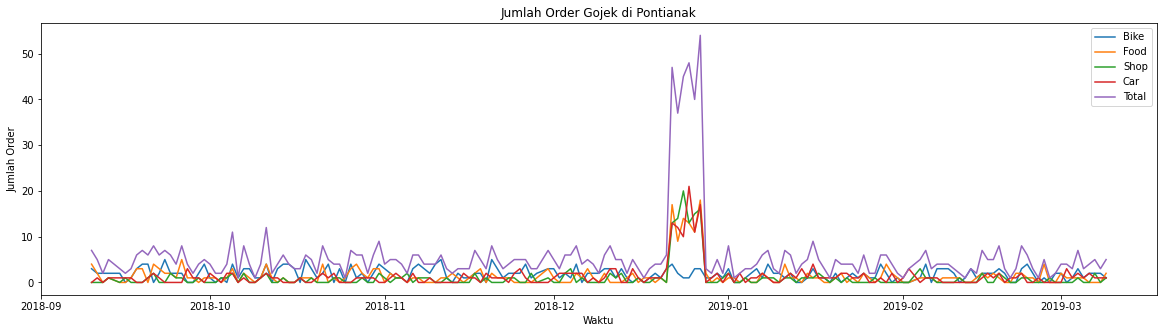

In [23]:
fig = plt.figure(figsize=(20,5))
gojek.bike.plot()
gojek.food.plot()
gojek.shop.plot()
gojek.car.plot()
gojek.total.plot()
plt.legend(['Bike', 'Food', 'Shop', 'Car', 'Total', 'Rate'])
plt.title('Jumlah Order Gojek di Pontianak')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Order')
plt.show()

## Preparing data Covid-19

In [24]:
covid.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,489,20,39,430,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,45.09,0.0,1.84,4.09%,7.98%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,491,20,39,432,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,45.27,0.0,1.84,4.07%,7.94%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-JB,Jawa Barat,3,0,0,3,12,5,5,2,Province,NaN,Jawa Barat,Indonesia,Asia,Jawa,UTC+07:00,NaN,18,9.0,627,645.0,5312.0,35378,45161325,1276.55,107.603708,-6.920432,0.07,0.27,0.0,0.11,41.67%,41.67%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,493,20,39,434,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,45.45,0.0,1.84,4.06%,7.91%,1.0,1.0


In [25]:
covid.tail()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
7092,10/11/2020,ID-SG,Sulawesi Tenggara,91,1,6,84,3568,66,2348,1154,Province,NaN,Sulawesi Tenggara,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,15,2.0,219,377.0,1911.0,38068,2635461,69.23,122.070311,-4.124689,34.53,1353.84,0.38,25.04,1.85%,65.81%,1.57,NaN
7093,10/11/2020,ID-SA,Sulawesi Utara,55,0,50,5,4798,180,3952,666,Province,NaN,Sulawesi Utara,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,11,4.0,171,332.0,1507.0,13892,2641884,190.17,124.521240,1.259638,20.82,1816.13,0.00,68.13,3.75%,82.37%,1.34,1.0
7094,10/11/2020,ID-SB,Sumatera Barat,353,3,206,144,8714,174,4893,3647,Province,NaN,Sumatera Barat,Indonesia,Asia,Sumatera,UTC+07:00,NaN,12,7.0,179,230.0,928.0,42013,5519245,131.37,100.465062,-0.850253,63.96,1578.84,0.54,31.53,2.00%,56.15%,1.45,0.6
7095,10/11/2020,ID-SS,Sumatera Selatan,33,0,41,-8,6776,371,5116,1289,Province,NaN,Sumatera Selatan,Indonesia,Asia,Sumatera,UTC+07:00,NaN,13,4.0,241,387.0,2853.0,91592,8217551,89.72,104.169465,-3.216212,4.02,824.58,0.00,45.15,5.48%,75.50%,0.50,0.0
7096,10/11/2020,ID-SU,Sumatera Utara,85,6,157,-78,11332,468,8706,2158,Province,NaN,Sumatera Utara,Indonesia,Asia,Sumatera,UTC+07:00,NaN,25,8.0,450,693.0,5417.0,72981,14874889,203.82,99.051964,2.191894,5.71,761.82,0.40,31.46,4.13%,76.83%,0.97,NaN


In [26]:
#melihat tipe data covid19
covid.dtypes

Date                            object
Location ISO Code               object
Location                        object
New Cases                        int64
New Deaths                       int64
New Recovered                    int64
New Active Cases                 int64
Total Cases                      int64
Total Deaths                     int64
Total Recovered                  int64
Total Active Cases               int64
Location Level                  object
City or Regency                float64
Province                        object
Country                         object
Continent                       object
Island                          object
Time Zone                       object
Special Status                  object
Total Regencies                  int64
Total Cities                   float64
Total Districts                  int64
Total Urban Villages           float64
Total Rural Villages           float64
Area (km2)                       int64
Population               

In [27]:
#melihat lokasi pada data covid
covid['Location'].unique()

array(['DKI Jakarta', 'Indonesia', 'Jawa Barat', 'Banten',
       'Sulawesi Tenggara', 'Kalimantan Timur',
       'Daerah Istimewa Yogyakarta', 'Sumatera Utara', 'Jawa Tengah',
       'Jawa Timur', 'Sulawesi Selatan', 'Maluku', 'Papua',
       'Maluku Utara', 'Aceh', 'Kalimantan Tengah', 'Lampung',
       'Sulawesi Tengah', 'Sumatera Barat', 'Papua Barat',
       'Kalimantan Utara', 'Sulawesi Barat', 'Sumatera Selatan', 'Bali',
       'Kalimantan Barat', 'Riau', 'Jambi', 'Kalimantan Selatan',
       'Kepulauan Bangka Belitung', 'Kepulauan Riau', 'Bengkulu',
       'Nusa Tenggara Barat', 'Sulawesi Utara', 'Nusa Tenggara Timur',
       'Gorontalo'], dtype=object)

In [28]:
#merubah kolom date menjadi tipe datetime
covid['Date'] = pd.to_datetime(covid['Date'].str.strip(), format='%m/%d/%Y')

In [29]:
#membuat dataframe baru dengan lokasi hanya di Kalimantan Barat
kalbar_data = covid.loc[covid['Location'] == 'Kalimantan Barat'].reset_index()

In [30]:
#mengambil 178 baris terakhir, menyesuaikan banyak data dari gojek
kalbar = kalbar_data.iloc[-178:].reset_index()

In [31]:
#mengambil kolom yang dianggap mempengaruhi jumlah order
kalbar = kalbar[['Date', 'New Cases', 'New Deaths', 'New Recovered', 'Total Cases', 'Total Deaths', 'Total Recovered', 'Total Cases per Million',
'Total Deaths per Million', 'Case Fatality Rate', 'Case Recovered Rate']]

In [32]:
#melihat dimensi data kalbar, jumlah baris sudah sesuai dengan data gojek
kalbar.shape

(178, 11)

In [33]:
#melihat kolom dalam data kalbar
kalbar.columns

Index(['Date', 'New Cases', 'New Deaths', 'New Recovered', 'Total Cases',
       'Total Deaths', 'Total Recovered', 'Total Cases per Million',
       'Total Deaths per Million', 'Case Fatality Rate',
       'Case Recovered Rate'],
      dtype='object')

In [34]:
kalbar

,Date,New Cases,New Deaths,New Recovered,Total Cases,Total Deaths,Total Recovered,Total Cases per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate
0,2020-04-17,0,0,0,21,3,6,3.87,0.55,14.29%,28.57%
1,2020-04-18,0,0,0,21,3,6,3.87,0.55,14.29%,28.57%
2,2020-04-19,0,0,0,21,3,6,3.87,0.55,14.29%,28.57%
3,2020-04-20,0,0,0,21,3,6,3.87,0.55,14.29%,28.57%
4,2020-04-21,6,0,1,27,3,7,4.98,0.55,11.11%,25.93%
...,...,...,...,...,...,...,...,...,...,...,...
173,2020-10-07,10,0,4,1095,9,878,201.92,1.66,0.82%,80.18%
174,2020-10-08,13,0,1,1108,9,879,204.32,1.66,0.81%,79.33%
175,2020-10-09,28,0,30,1136,9,909,209.49,1.66,0.79%,80.02%
176,2020-10-10,80,0,7,1216,9,916,224.24,1.66,0.74%,75.33%


In [35]:
#membuat dataframe data, kombinasi dari data kalbar dan gojek
data = pd.concat([kalbar,gojek_data], axis=1)
data.head()

,Date,New Cases,New Deaths,New Recovered,Total Cases,Total Deaths,Total Recovered,Total Cases per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,bike,food,shop,car,total,rate
0,2020-04-17,0,0,0,21,3,6,3.87,0.55,14.29%,28.57%,3,4,0,0,7,NaN
1,2020-04-18,0,0,0,21,3,6,3.87,0.55,14.29%,28.57%,2,2,0,1,5,-0.285714
2,2020-04-19,0,0,0,21,3,6,3.87,0.55,14.29%,28.57%,2,0,0,0,2,-0.600000
3,2020-04-20,0,0,0,21,3,6,3.87,0.55,14.29%,28.57%,2,1,1,1,5,1.500000
4,2020-04-21,6,0,1,27,3,7,4.98,0.55,11.11%,25.93%,2,0,0,1,3,-0.400000


In [36]:
#membuat kolom baru, yang digunakan sebagai target untuk prediksi nilai order
data['total_30d'] = data['total'].shift(-30)

In [37]:
#membuang nilai NaN
data.dropna(inplace=True)

In [38]:
#mengatur kolom date sebagai index
data.set_index('Date', inplace=True)

In [39]:
data.tail()

,New Cases,New Deaths,New Recovered,Total Cases,Total Deaths,Total Recovered,Total Cases per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,bike,food,shop,car,total,rate,total_30d
Date,,,,,,,,,,,,,,,,,
2020-09-07,0,0,0,704,6,614,129.82,1.11,0.85%,87.22%,0,0,0,3,3,2.000000,3.0
2020-09-08,7,0,5,711,6,619,131.11,1.11,0.84%,87.06%,1,1,3,0,5,0.666667,4.0
2020-09-09,12,0,2,723,6,621,133.33,1.11,0.83%,85.89%,4,1,1,1,7,0.400000,5.0
2020-09-10,5,0,0,728,6,621,134.25,1.11,0.82%,85.30%,0,1,1,1,3,-0.571429,3.0
2020-09-11,8,0,23,736,6,644,135.72,1.11,0.82%,87.50%,3,0,0,1,4,0.333333,5.0


## Preparing data untuk model

In [40]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

total_cases = np.array(data['Total Cases'])
total_order = np.array(data.total)

cases_scaled = min_max_scaler.fit_transform(total_cases.reshape(-1,1))
order_scaled = min_max_scaler.fit_transform(total_order.reshape(-1,1))

#menentukan variabel x dan y
X= data[['New Cases', 'New Deaths', 'New Recovered','Total Cases','Total Deaths','Total Recovered', 'total']]
#scaling variabel x
X= preprocessing.scale(X)
y= data['total_30d']

## Visualisasi data

Menampilkan data jumlah order gojek dan jumlah cases covid

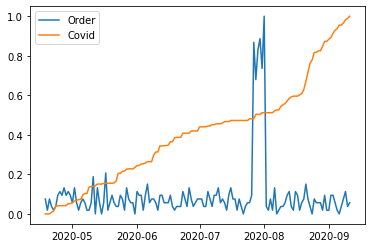

In [41]:
plt.plot(data.index, order_scaled)
plt.plot(data.index, cases_scaled)
plt.legend(['Order','Covid'])
plt.show()

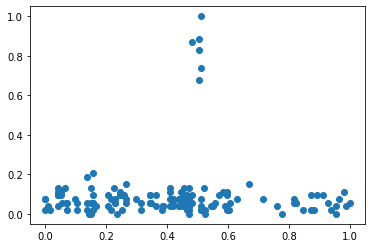

In [42]:
plt.scatter(cases_scaled, order_scaled)
plt.show()

# Modelling

## Split data

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=178)

## Modelling dengan RandomForestRegressor

Dengan nilai estimator awal 100

In [44]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=178)
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=178, verbose=0, warm_start=False)

In [48]:
#menampilkan score atau nilai r^2
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))

0.17251673947949675
-4.110721065863963


Dapat dilihat bahwa nilai score untuk data train dan data test memiliki hasil yang buruk

## Evaluating

In [49]:
from sklearn import metrics

In [52]:
#mencoba nilai estimator dari nilai 1 sampai 150

r2 = []
mse = []
for i in range(1, 151):
    rf=RandomForestRegressor(n_estimators=i, random_state=178)
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    r2.append(rf.score(x_test,y_test))
    mse.append(metrics.mean_squared_error(y_test, y_pred))

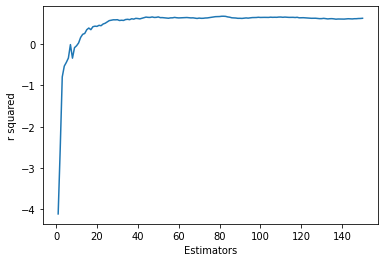

In [53]:
#menampilkan hasil r^2 berdasarkan nilai estimator

plt.plot(range(1, 151), r2)
plt.xlabel("Estimators")
plt.ylabel('r squared')
plt.show()

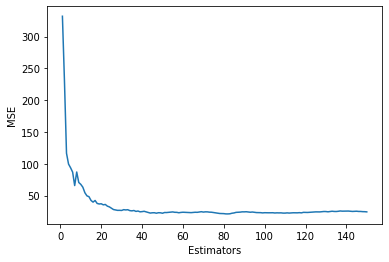

In [54]:
#menampilkan hasil mse berdasarkan nilai estimator

plt.plot(range(1, 151), mse)
plt.xlabel("Estimators")
plt.ylabel('MSE')
plt.show()

In [55]:
#mengetahui nilai estimator terbaik

print(r2.index(max(r2)))
print(mse.index(min(mse)))

best_estimator = mse.index(min(mse))

81
81


Setelah mendapatkan nilai estimator terbaik, kemudian dilakukan modeling ulang

In [56]:
rf = RandomForestRegressor(n_estimators=best_estimator, random_state=178)
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=81, n_jobs=None, oob_score=False,
                      random_state=178, verbose=0, warm_start=False)

In [57]:
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))

0.919873873200112
0.6745440632744559


Dari hasil di atas, dapat dilihat model menghasilkan score dengan nilai yang dapat diterima

## Hasil Prediksi

In [58]:
#mengambil data pada 30 hari terkahir dan dilakukan prediksi nilai jumlah order

X_30=X[-30:]
predict = rf.predict(X_30)

In [60]:
#memasukkan nilai prediksi ke dalam dataframe data

from datetime import datetime, timedelta
last_date=data.iloc[-1].name
modified_date = last_date + timedelta(days=1)
date=pd.date_range(modified_date,periods=30,freq='D')
df1=pd.DataFrame(predict,columns=['Prediction'],index=date)
data=data.append(df1)
data.head()

,New Cases,New Deaths,New Recovered,Total Cases,Total Deaths,Total Recovered,Total Cases per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,bike,food,shop,car,total,rate,total_30d,Prediction
2020-04-18,0.0,0.0,0.0,21.0,3.0,6.0,3.87,0.55,14.29%,28.57%,2.0,2.0,0.0,1.0,5.0,-0.285714,2.0,NaN
2020-04-19,0.0,0.0,0.0,21.0,3.0,6.0,3.87,0.55,14.29%,28.57%,2.0,0.0,0.0,0.0,2.0,-0.600000,4.0,NaN
2020-04-20,0.0,0.0,0.0,21.0,3.0,6.0,3.87,0.55,14.29%,28.57%,2.0,1.0,1.0,1.0,5.0,1.500000,6.0,NaN
2020-04-21,6.0,0.0,1.0,27.0,3.0,7.0,4.98,0.55,11.11%,25.93%,2.0,0.0,0.0,1.0,3.0,-0.400000,4.0,NaN
2020-04-22,4.0,0.0,1.0,31.0,3.0,8.0,5.72,0.55,9.68%,25.81%,0.0,0.0,1.0,1.0,2.0,-0.333333,3.0,NaN


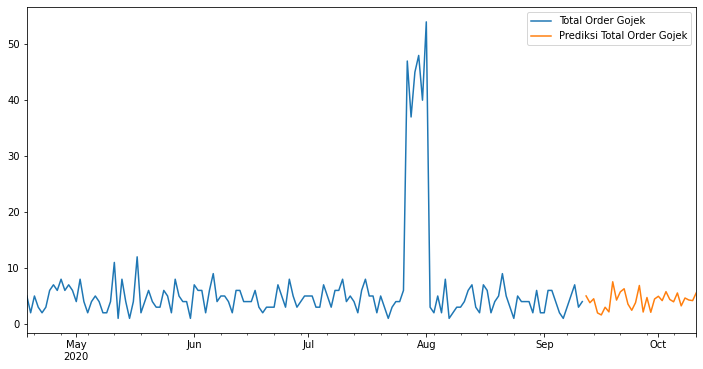

In [61]:
#melihat hasil prediksi

data['total'].plot(figsize=(12,6),label='Total Order Gojek')
data['Prediction'].plot(label='Prediksi Total Order Gojek')
plt.legend()

Dari hasil grafik di atas, diketahui bahwa nilai prediksi tidak memiliki perbedaan signifikan dengan nilai order periode sebelumnya. Hasil ini dapat digunakan untuk pertimbangan pada keputusan yang diambil oleh tim Business Development Gojek.